# MNIST Dataset Classification

### Let's import some libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.optimizers import SGD
from keras import utils
from keras.datasets import mnist

Using TensorFlow backend.


### Let's load the data

In [2]:
(trainX,trainY),(testX,testY) = mnist.load_data()

In [3]:
train_images = trainX
test_images = testX
train_label = trainY
test_label = testY

In [4]:
print('shape of trainX: ', trainX.shape, 'shape of trainY: ', trainY.shape)

shape of trainX:  (60000, 28, 28) shape of trainY:  (60000,)


In [5]:
print('shape of testX: ', testX.shape, 'shape of testY: ', testY.shape)

shape of testX:  (10000, 28, 28) shape of testY:  (10000,)


### Assigning Class Labels

In [6]:
class_label = [0,1,2,3,4,5,6,7,8,9]

### Viewing few data

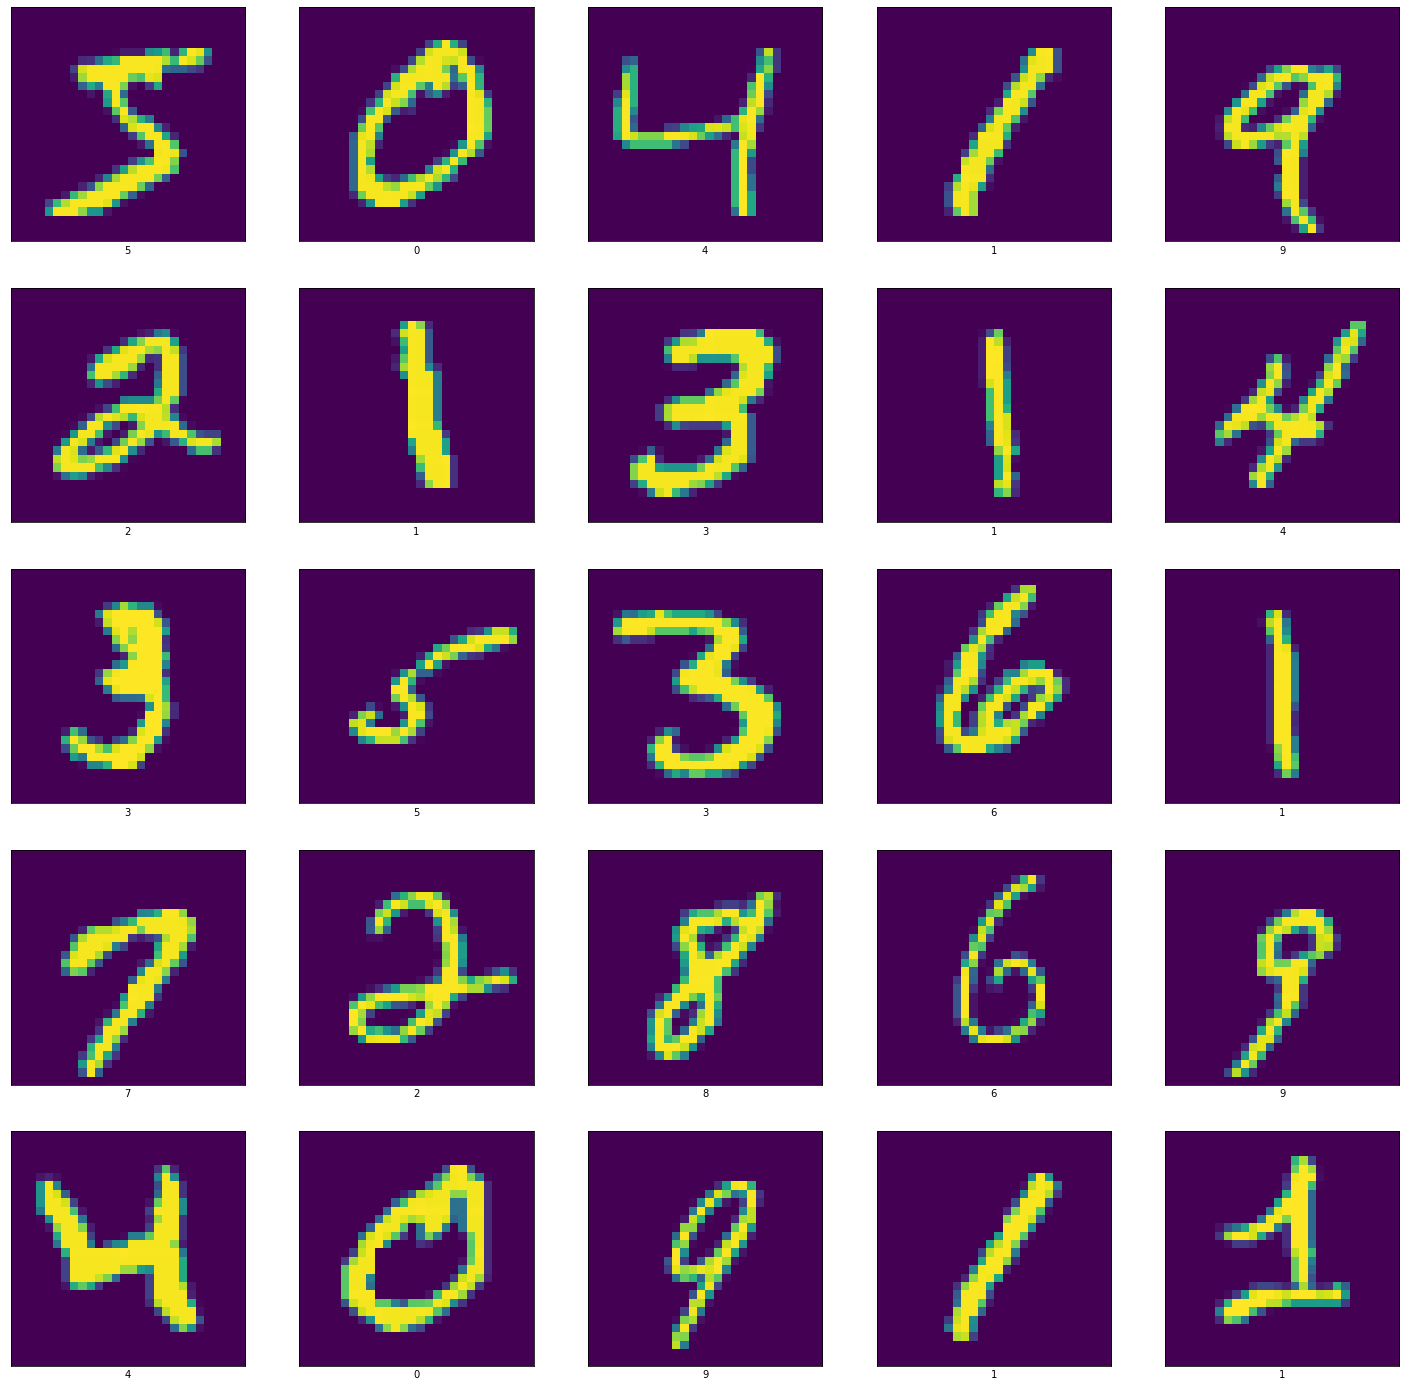

In [7]:
plt.figure(figsize=(25,25))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(trainX[i])
    plt.xlabel(class_label[trainY[i]])
plt.show()

### Normalizing the data and reshaping to fit keras api

In [8]:
trainX = trainX / 255.0
testX = testX / 255.0

In [9]:
trainX = trainX.reshape(60000,28,28,1)
testX = testX.reshape(10000,28,28,1)

In [10]:
trainY = utils.to_categorical(trainY)
testY = utils.to_categorical(testY)

### Building model

In [11]:
model = Sequential()
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))
opt=SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=opt,metrics=['accuracy'],loss='categorical_crossentropy')

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________


### Fitting the model with data and trying different hyperparameters

In [13]:
history = model.fit(trainX,trainY,epochs=25,batch_size=128,validation_data=(testX,testY),verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/25





 - 4s - loss: 0.4380 - acc: 0.8706 - val_loss: 0.2345 - val_acc: 0.9334
Epoch 2/25
 - 3s - loss: 0.2138 - acc: 0.9377 - val_loss: 0.1791 - val_acc: 0.9467
Epoch 3/25
 - 3s - loss: 0.1654 - acc: 0.9522 - val_loss: 0.1497 - val_acc: 0.9544
Epoch 4/25
 - 3s - loss: 0.1344 - acc: 0.9611 - val_loss: 0.1233 - val_acc: 0.9634
Epoch 5/25
 - 3s - loss: 0.1140 - acc: 0.9664 - val_loss: 0.1176 - val_acc: 0.9646
Epoch 6/25
 - 3s - loss: 0.0999 - acc: 0.9702 - val_loss: 0.1027 - val_acc: 0.9687
Epoch 7/25
 - 3s - loss: 0.0871 - acc: 0.9743 - val_loss: 0.1019 - val_acc: 0.9685
Epoch 8/25
 - 3s - loss: 0.0789 - acc: 0.9766 - val_loss: 0.1022 - val_acc: 0.9679
Epoch 9/25
 - 3s - loss: 0.0715 - acc: 0.9793 - val_loss: 0.0923 - val_acc: 0.9706
Epoch 10/25
 - 3s - loss: 0.0640 - acc: 0.9816 - val_loss: 0.0948 - val_acc: 0.9709
Epoch 11/25
 - 3s

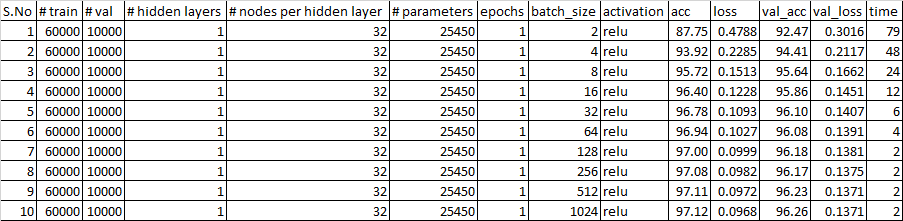

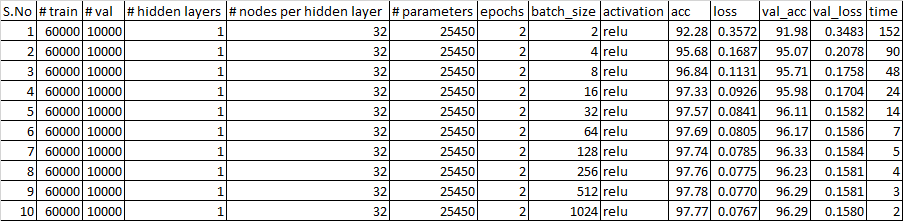

In [14]:
predictions = model.predict(testX)
predictions.shape

(10000, 10)

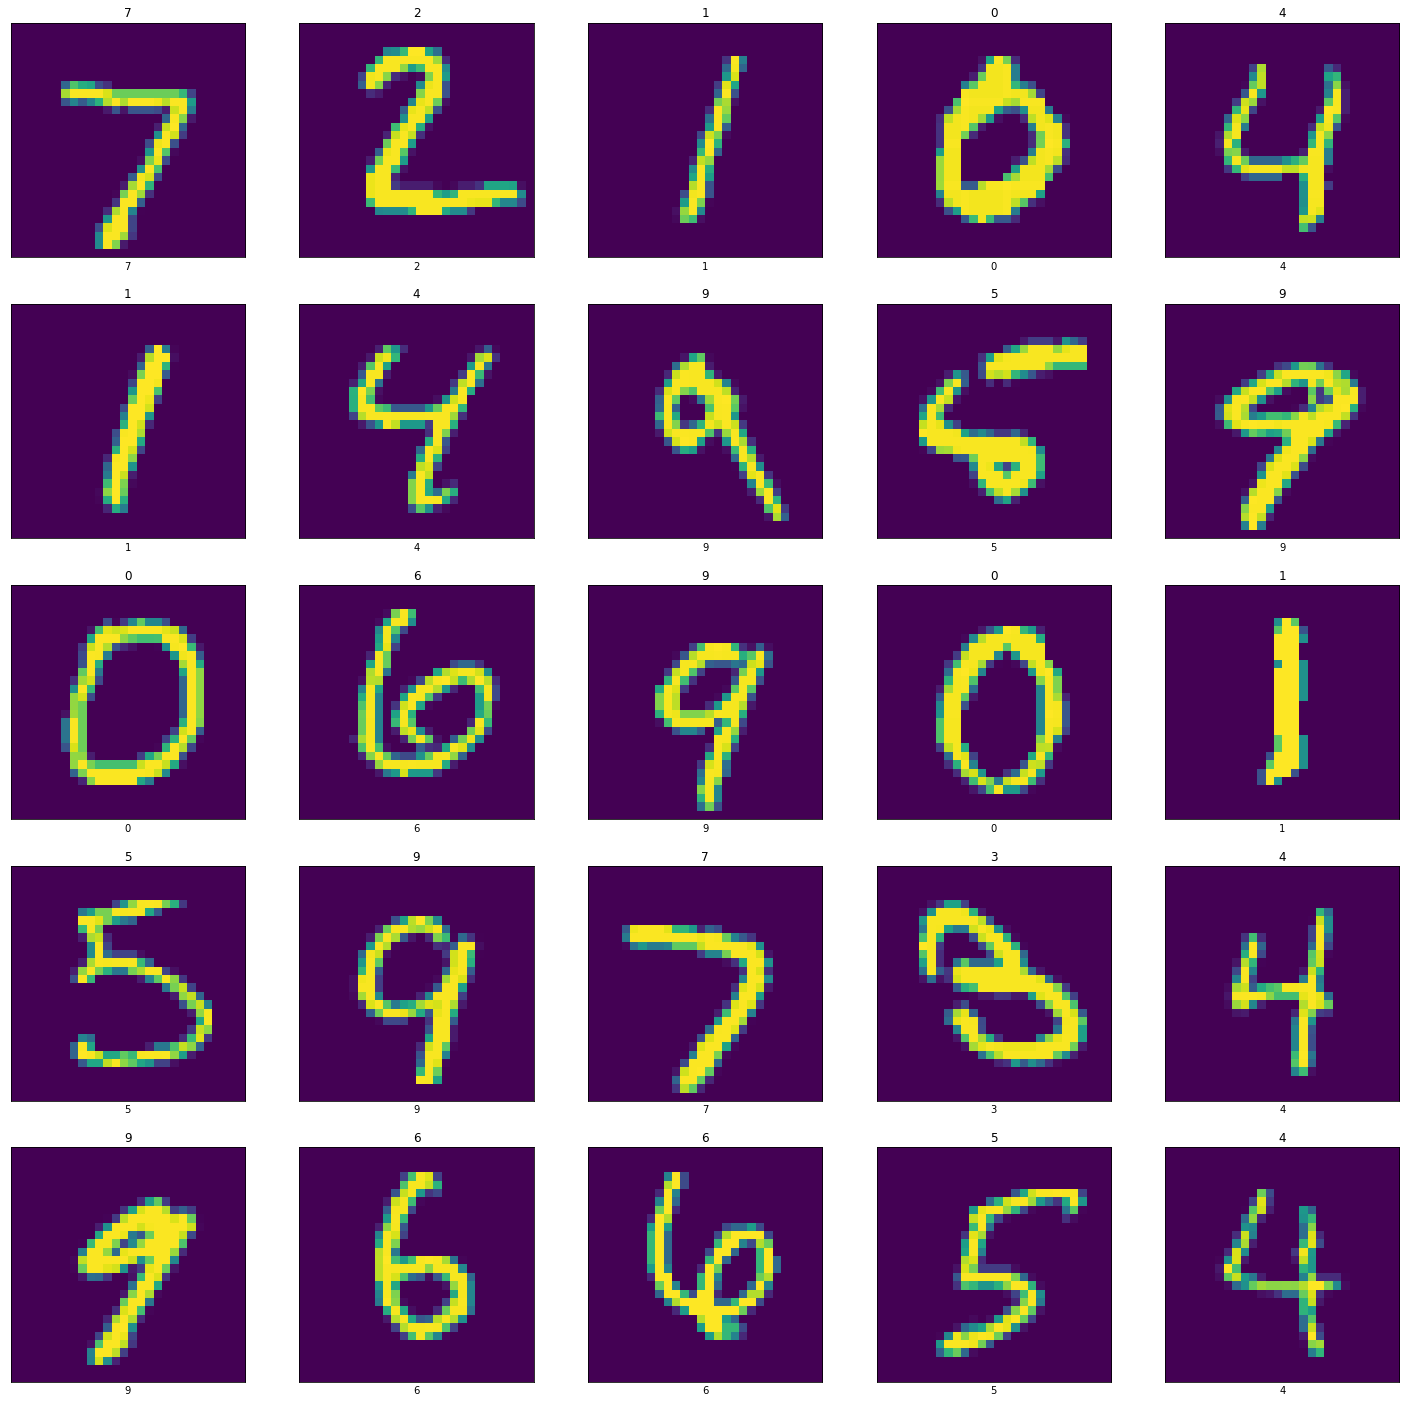

In [15]:
plt.figure(figsize=(25,25))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i])
    plt.xlabel(class_label[np.argmax(predictions[i])])
    plt.title(class_label[test_label[i]])
plt.show()

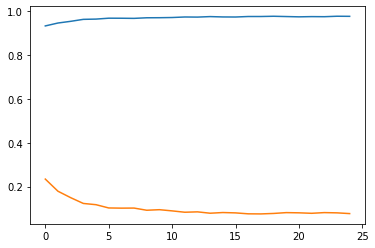

In [16]:
x = range(25)
plt.subplot(111)
plt.plot(x, history.history['val_acc'],label='acc')
plt.plot(x, history.history['val_loss'],label='loss')
plt.show()